# **<center>ETHEREUM FRAUD DETECTION</center>** 

**Problem Statement**
* To predict weather the transaction is fraudulent or not-fraudulent using the transaction data.

## **Dataset Description** 
* The dataset folder contains the following files:  
transaction_dataset.csv : (9841, 51)

**Columns Provided in the Dataset**
```
Index: the index number of a row

Address: the address of the ethereum account

FLAG: whether the transaction is fraud or not

Avg min between sent tnx: Average time between sent transactions for account in minutes

Avgminbetweenreceivedtnx: Average time between received transactions for account in minutes

TimeDiffbetweenfirstand_last(Mins): Time difference between the first and last transaction

Sent_tnx: Total number of sent normal transactions

Received_tnx: Total number of received normal transactions

NumberofCreated_Contracts: Total Number of created contract transactions

UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transactions

UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions

MinValueReceived: Minimum value in Ether ever received

MaxValueReceived: Maximum value in Ether ever received

AvgValueReceived5Average value in Ether ever received

MinValSent: Minimum value of Ether ever sent

MaxValSent: Maximum value of Ether ever sent

AvgValSent: Average value of Ether ever sent

MinValueSentToContract: Minimum value of Ether sent to a contract

MaxValueSentToContract: Maximum value of Ether sent to a contract

AvgValueSentToContract: Average value of Ether sent to contracts

TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions

TotalEtherSent:Total Ether sent for account address

TotalEtherReceived: Total Ether received for account address

TotalEtherSent_Contracts: Total Ether sent to Contract addresses

TotalEtherBalance: Total Ether Balance following enacted transactions

TotalERC20Tnxs: Total number of ERC20 token transfer transactions

ERC20TotalEther_Received: Total ERC20 token received transactions in Ether

ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether

ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether

ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses

ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses

ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses

ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes

ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes

ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions

ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account

ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account

ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account

ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account

ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account

ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account

ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred

ERC20UniqRecTokenName: Number of Unique ERC20 tokens received

ERC20MostSentTokenType: Most sent token for account via ERC20 transaction

ERC20MostRecTokenType: Most received token for account via ERC20 transactions
```

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
# Read csv file using pandas
path = '/content/drive/MyDrive/Projects/Ethereum Fraud Detection/transaction_dataset.csv'
df = pd.read_csv(path)

## **Basic EDA**

In [4]:
#check shape of the dataset
df.shape

(9841, 51)

In [5]:
# check columns of dataset
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [6]:
#drop Unnamed: 0, Address, Index from dataset
df.drop(columns = ['Unnamed: 0', 'Address', 'Index'], inplace = True)

In [7]:
# Check which columns are having categorical, numerical or boolean values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [8]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FLAG,9841.0,2.214206e-01,4.152241e-01,0.00,0.000000,0.000000e+00,0.000000,1.000000e+00
Avg min between sent tnx,9841.0,5.086879e+03,2.148655e+04,0.00,0.000000,1.734000e+01,565.470000,4.302877e+05
Avg min between received tnx,9841.0,8.004851e+03,2.308171e+04,0.00,0.000000,5.097700e+02,5480.390000,4.821755e+05
Time Diff between first and last (Mins),9841.0,2.183333e+05,3.229379e+05,0.00,316.930000,4.663703e+04,304070.980000,1.954861e+06
Sent tnx,9841.0,1.159317e+02,7.572264e+02,0.00,1.000000,3.000000e+00,11.000000,1.000000e+04
Received Tnx,9841.0,1.637009e+02,9.408366e+02,0.00,1.000000,4.000000e+00,27.000000,1.000000e+04
Number of Created Contracts,9841.0,3.729702e+00,1.414456e+02,0.00,0.000000,0.000000e+00,0.000000,9.995000e+03
Unique Received From Addresses,9841.0,3.036094e+01,2.986211e+02,0.00,1.000000,2.000000e+00,5.000000,9.999000e+03
Unique Sent To Addresses,9841.0,2.584016e+01,2.638204e+02,0.00,1.000000,2.000000e+00,3.000000,9.287000e+03
min value received,9841.0,4.384515e+01,3.259291e+02,0.00,0.001000,9.585600e-02,2.000000,1.000000e+04


In [9]:
# check length of dataset
print(f" dataset length : {len(df)}")

 dataset length : 9841


In [10]:
# loop through datatset to find count of unique values of each column
for col in df.columns:
  print(f" {col} : {len(df[col].value_counts())}")

 FLAG : 2
 Avg min between sent tnx : 5013
 Avg min between received tnx : 6223
 Time Diff between first and last (Mins) : 7810
 Sent tnx : 641
 Received Tnx : 727
 Number of Created Contracts : 20
 Unique Received From Addresses : 256
 Unique Sent To Addresses : 258
 min value received : 4589
 max value received  : 6302
 avg val received : 6767
 min val sent : 4719
 max val sent : 6647
 avg val sent : 5854
 min value sent to contract : 3
 max val sent to contract : 4
 avg value sent to contract : 4
 total transactions (including tnx to create contract : 897
 total Ether sent : 5868
 total ether received : 6728
 total ether sent contracts : 4
 total ether balance : 5717
  Total ERC20 tnxs : 300
  ERC20 total Ether received : 3460
  ERC20 total ether sent : 1415
  ERC20 total Ether sent contract : 29
  ERC20 uniq sent addr : 107
  ERC20 uniq rec addr : 147
  ERC20 uniq sent addr.1 : 4
  ERC20 uniq rec contract addr : 123
  ERC20 avg time between sent tnx : 1
  ERC20 avg time between rec

In [11]:
# Check for missing values in all the columnns of the dataset
df.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

## **Correlation Matrix**

### **Why?**
* A correlation matrix is a table showing correlation coefficients between variables

### **There are three broad reasons for computing a correlation matrix:**

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [12]:
# Using pandas
df.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,-0.019259,-0.011881,0.006626,-0.022437,-0.063556,-0.007213,-0.007988,-0.008883,-0.100289,-0.014993,-0.016900,-0.007988,-0.003229,-0.025697,-0.004475,0.024762,0.013514,-0.020554,-0.017539,-0.003047,-0.018527,nan,nan,nan,nan,0.011163,-0.004313,0.007881,0.025364,0.025038,0.025044,nan,nan,nan,0.009249,-0.018047
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,-0.007104,-0.004382,-0.000789,-0.005716,0.003597,-0.000210,0.001044,0.000759,-0.043586,-0.006440,-0.007285,0.001044,-0.001425,-0.012307,-0.002542,-0.002105,-0.004409,-0.009477,-0.001133,-0.012754,0.045615,nan,nan,nan,nan,0.004673,-0.002456,-0.003149,-0.001687,-0.002020,-0.001965,nan,nan,nan,0.000529,0.047202
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,-0.011575,-0.009313,-0.008761,-0.012176,-0.040011,-0.003916,-0.003230,-0.003940,-0.060711,-0.009442,-0.010720,-0.003230,-0.002149,-0.020578,-0.003656,-0.003876,-0.006160,-0.014776,-0.016037,-0.014698,-0.014932,nan,nan,nan,nan,-0.008319,-0.003544,-0.005606,-0.003758,-0.003780,-0.003727,nan,nan,nan,-0.019896,-0.014966
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,-0.002240,-0.014002,-0.013107,0.014194,-0.046039,0.001734,0.036162,0.029440,0.189311,0.012999,0.014756,0.036162,0.002955,0.075922,0.046788,-0.005014,-0.008389,0.040686,0.080709,0.019961,0.319176,nan,nan,nan,nan,-0.010543,0.046512,0.049020,-0.006852,-0.006268,-0.006802,nan,nan,nan,0.263939,0.324288
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,0.102109,0.140677,-0.004846,0.225356,0.027468,0.029529,0.013263,0.020865,0.731503,0.244434,0.155811,0.013263,-0.127211,0.381311,0.006683,-0.000315,-0.002897,0.356065,0.300461,-0.008379,0.219665,nan,nan,nan,nan,-0.003868,0.004291,0.008843,-0.001557,-0.001019,-0.001415,nan,nan,nan,0.079728,0.220614
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.648655,0.164112,-0.022936,0.224805,-0.001786,0.093448,0.097769,0.125075,0.020645,0.008243,0.013767,0.806393,0.132150,0.235282,0.008243,0.158146,0.116203,0.016501,-0.000452,0.104870,0.044187,0.136485,0.337727,0.201686,nan,nan,nan,nan,-0.004464,0.015379,0.019126,-0.001899,-0.000744,-0.000918,nan,nan,nan,0.042681,0.202747
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,-0.000752,-0.000498,-0.000913,0.141919,-0.001083,-0.000261,-0.000225,-0.000270,0.281428,0.024877,-0.000753,-0.000225,-0.037902,0.249500,0.002072,0.001166,-0.000374,0.154788,0.190646,-0.001083,0.028986,nan,nan,nan,nan,-0.000788,0.000920,0.002052,-0.000092,0.00014

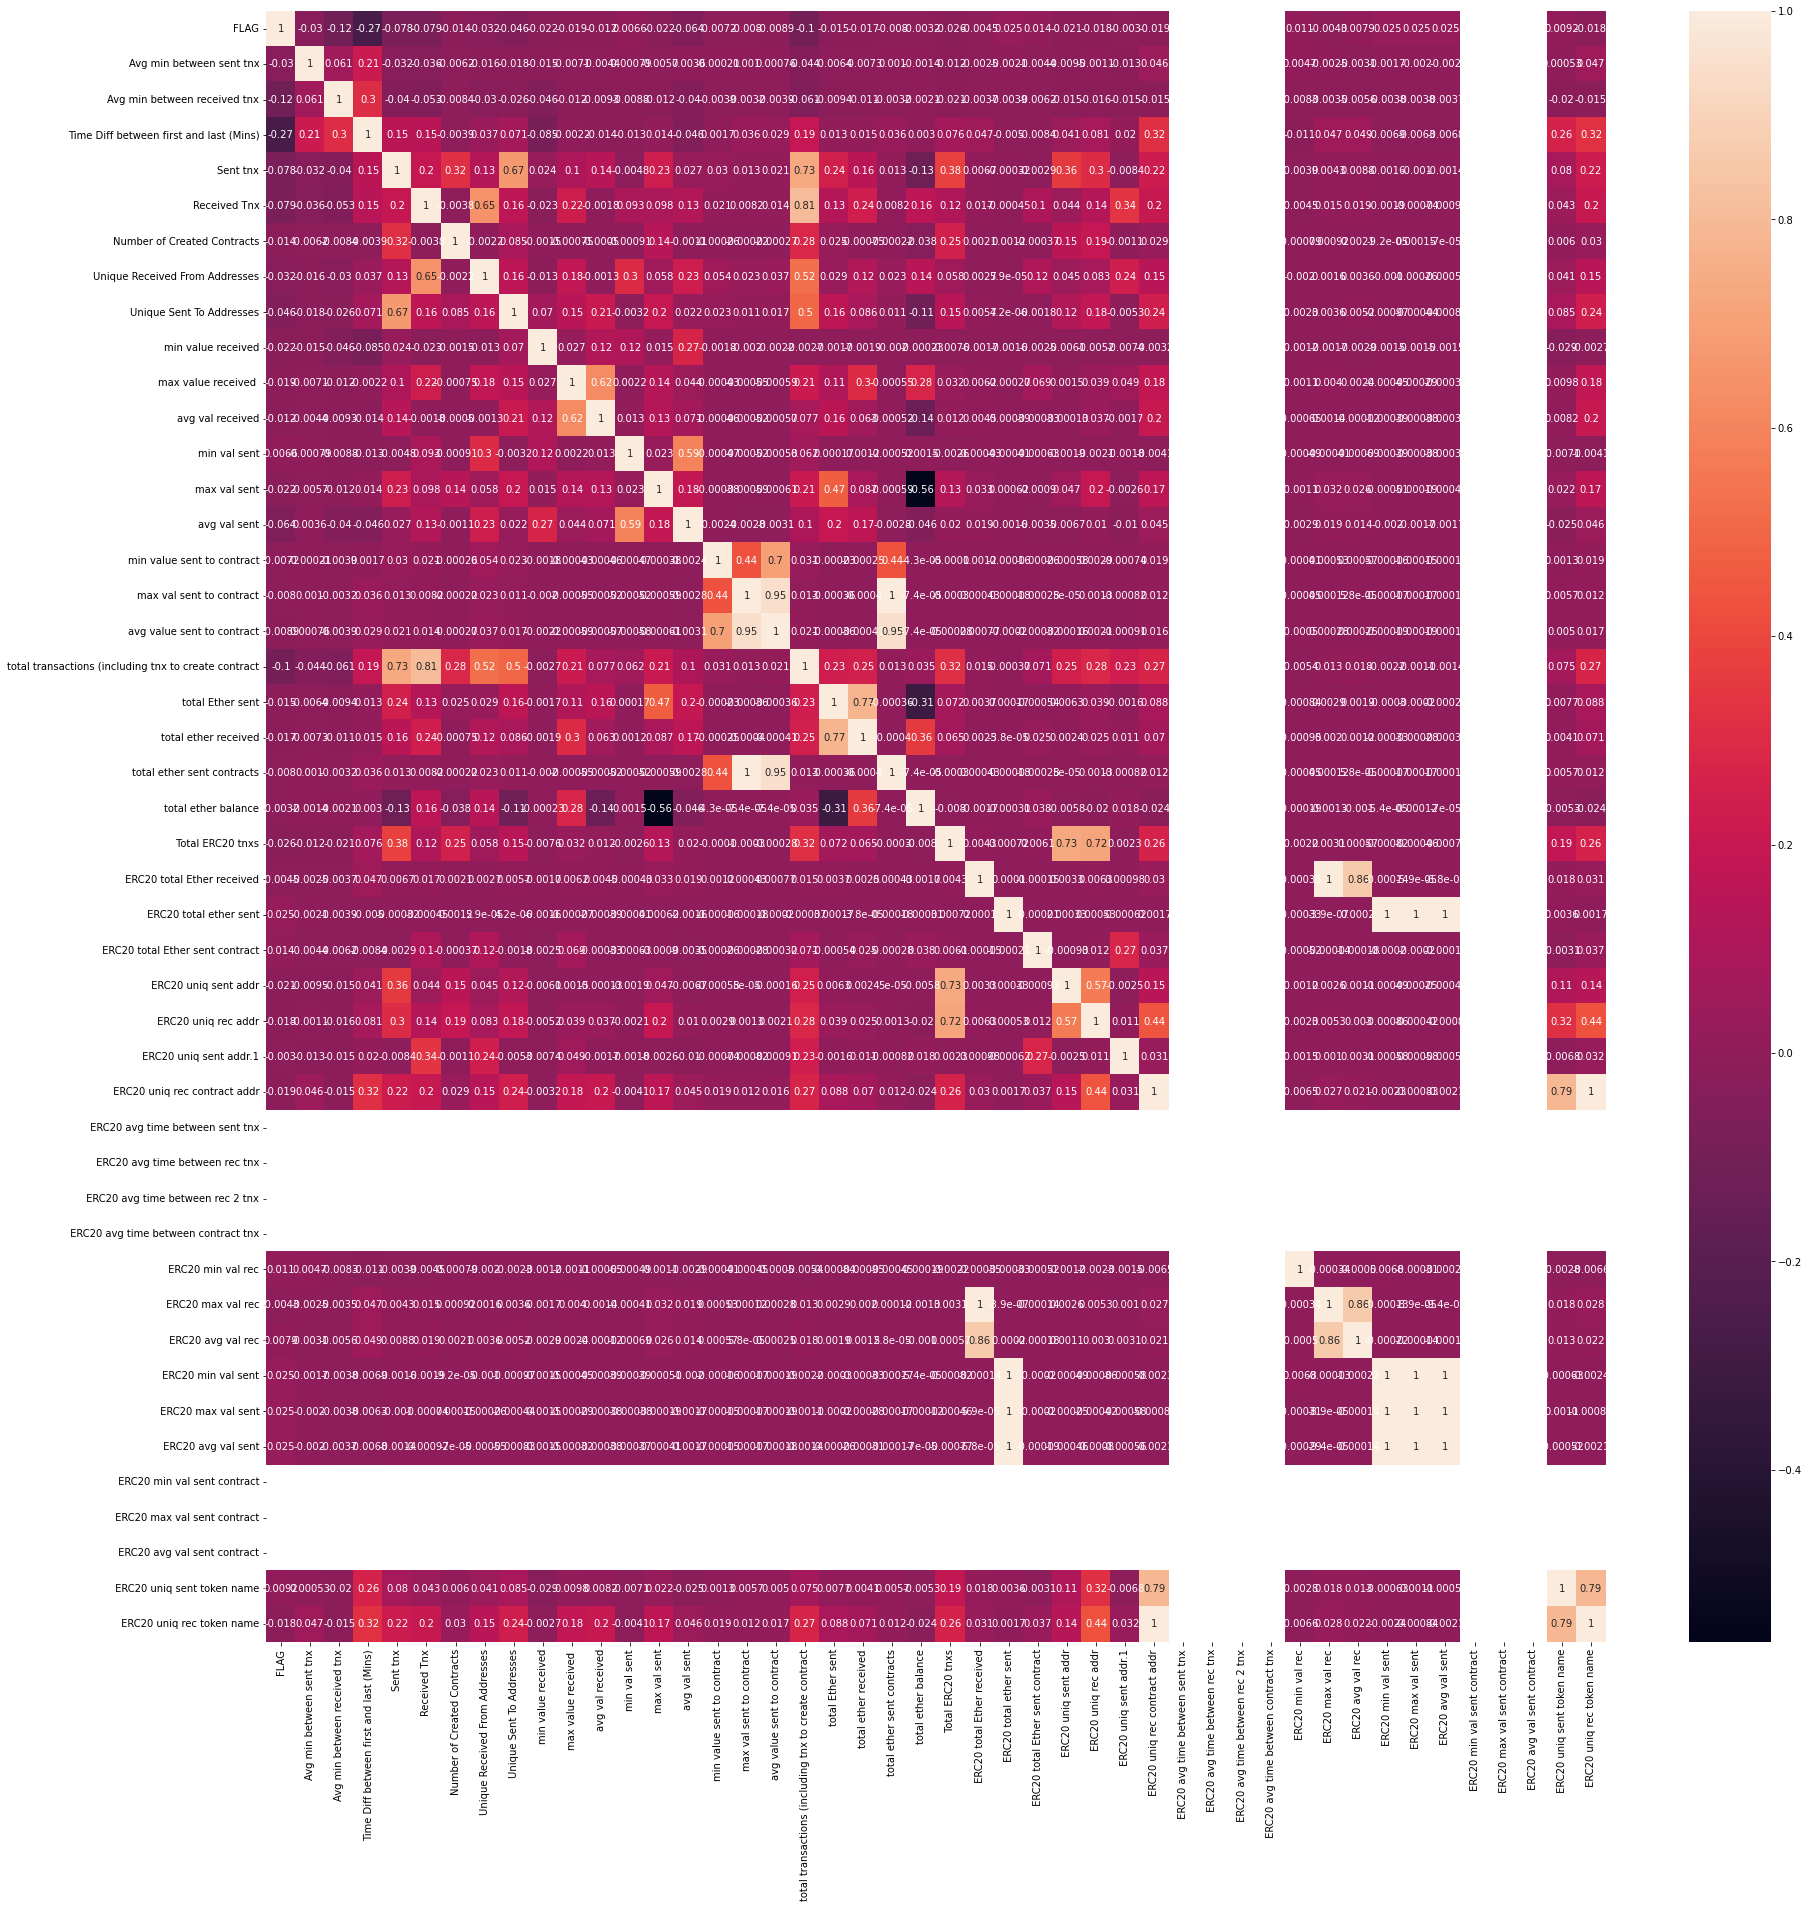

In [13]:
 #Using seaborn
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True)

## **CHECKING IF DATASET IS SKEWED OR NOT**

## **Histogram**

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

In [14]:
df.columns[:6]

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx'],
      dtype='object')

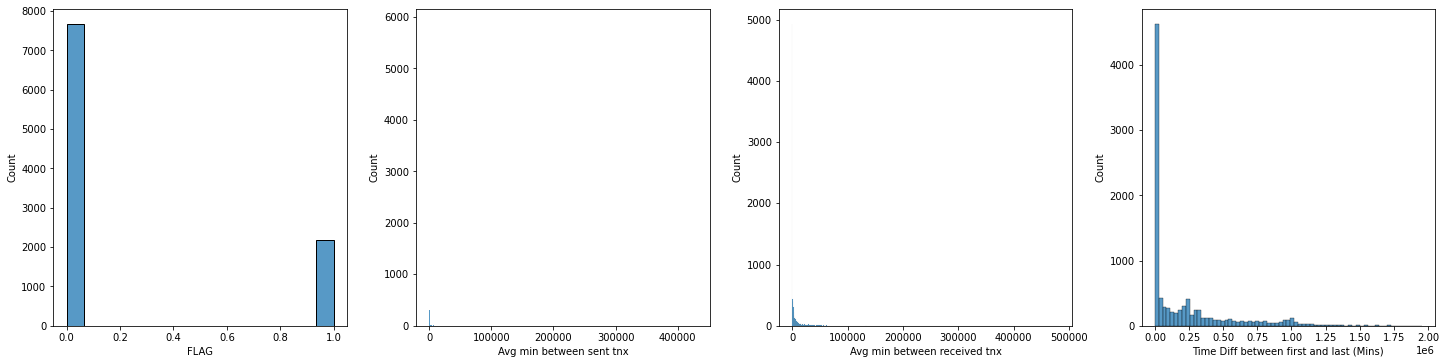

In [15]:
# Histogram using pandas 
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,5))
index = 0
ax = ax.flatten()
for col, value in df.iloc[ : , : 4].items():
  if df[col].dtypes != 'O':
    sns.histplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## **Skewness**
* The skew method returns a scalar value representing the skewness of the distribution. A positive value indicates a positive skew (i.e., the tail on the right side of the distribution is longer), a negative value indicates a negative skew (i.e., the tail on the left side of the distribution is longer), and a value of 0 indicates that the distribution is symmetrical

In [16]:
# check skewness of dataset
df.skew(axis = 0, skipna = True)

<ipython-input-16-77a6948006c4>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True)


FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
min value 

After checking skewness of dataset and from histogram we can see that the dataset is heavily skewed, with most of the weight being on the left tail.

## **CHECKING IF DATASET IS BALANCED OR NOT**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


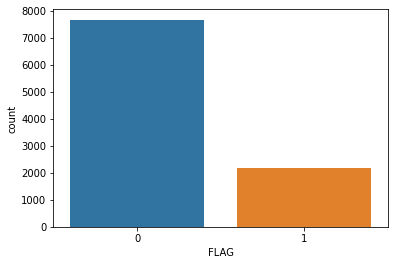

In [17]:
# count plot of flag column
sns.countplot(df['FLAG'])

In [18]:
# check total number of fraudulent and non-fraudulent instances
df['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [19]:
# find Percentage of non-fraudulent instances
print(f"% of fraudulent instances : {round(df['FLAG'].value_counts(normalize = True)[0]*100,0)}%")

% of fraudulent instances : 78.0%


In [20]:
# find Percentage of fraudulent instances
print(f"% of fraudulent instances : {round(df['FLAG'].value_counts(normalize = True)[1]*100,0)}%")

% of fraudulent instances : 22.0%


* The dataset is heavily imbalanced with only 22% of fraudulent instance.

## **Understanding more about dataset**

In [21]:
# display unique values in categorical columns
for col in df.columns:
  if df[col].dtypes == 'O':
    print(df[col].unique)

<bound method Series.unique of 0            Cofoundit
1       Livepeer Token
2                 None
3               Raiden
4        StatusNetwork
             ...      
9836                  
9837                  
9838                  
9839               NaN
9840                  
Name:  ERC20 most sent token type, Length: 9841, dtype: object>
<bound method Series.unique of 0                              Numeraire
1                         Livepeer Token
2                                  XENON
3                                  XENON
4                                    EOS
                      ...               
9836                          GSENetwork
9837               Blockwell say NOTSAFU
9838    Free BOB Tokens - BobsRepair.com
9839                                 NaN
9840                          INS Promo1
Name:  ERC20_most_rec_token_type, Length: 9841, dtype: object>


In [22]:
# drop categorical columns
for col in df.columns:
  if df[col].dtypes == 'O':
    df.drop(columns = [col], inplace = True)

* Most of the tockens occur only once so they are irrelevant in fraud detection. So droped them.

In [23]:
# Replace missings of numerical variables with median
for col in df.columns:
  df[col] = df[col].fillna(df[col].median())

In [24]:
# Filtering the features with 0 variance
variance = df.var()

# Select only the features with a non-zero variance
df_filtered = df[variance[variance > 0].index]
# Drop features with 0 variance --- these features will not help in the performance of the model
df = df.drop(columns = df[variance[variance == 0].index].columns, axis =1)

In [25]:
df_copied = df.copy()

In [26]:
# drop columns that holds only zeros and highly correlated features
df.drop(columns = ['min value sent to contract', 'max val sent to contract','avg value sent to contract',' ERC20 uniq sent addr.1'], axis = 1, inplace = True)
upper_tri = df.corr().where(np.triu(np.ones(df.corr().shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
df = df.drop(columns = to_drop, axis=1)

<ipython-input-26-967f9e24f774>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = df.corr().where(np.triu(np.ones(df.corr().shape),k=1).astype(np.bool))


In [27]:
# Check which columns are having categorical, numerical or boolean values  ERC20 uniq sent addr.1 'avg value sent to contract'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9841 non-null   int64  
 1   Avg min between sent tnx                 9841 non-null   float64
 2   Avg min between received tnx             9841 non-null   float64
 3   Time Diff between first and last (Mins)  9841 non-null   float64
 4   Sent tnx                                 9841 non-null   int64  
 5   Received Tnx                             9841 non-null   int64  
 6   Number of Created Contracts              9841 non-null   int64  
 7   min value received                       9841 non-null   float64
 8   max value received                       9841 non-null   float64
 9   min val sent                             9841 non-null   float64
 10  max val sent                             9841 no

In [28]:
#recheck the correlation matrix
df.corr()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,min value received,max value received,min val sent,max val sent,total Ether sent,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq rec contract addr,ERC20 min val rec
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.021641,-0.019259,0.006626,-0.022437,-0.014993,-0.007988,-0.003229,-0.034132,-0.005711,0.018428,0.008127,-0.052473,0.004434
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.014886,-0.007104,-0.000789,-0.005716,-0.006440,0.001044,-0.001425,-0.011061,-0.002339,-0.001916,-0.004101,0.047946,0.004998
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.045753,-0.011575,-0.008761,-0.012176,-0.009442,-0.003230,-0.002149,-0.019177,-0.003430,-0.003653,-0.005813,-0.011693,-0.007794
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,-0.084996,-0.002240,-0.013107,0.014194,0.012999,0.036162,0.002955,0.078482,0.046570,-0.004338,-0.007337,0.324088,-0.008921
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.024015,0.102109,-0.004846,0.225356,0.244434,0.013263,-0.127211,0.381859,0.006840,-0.000158,-0.002652,0.221971,-0.003480
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,-0.022936,0.224805,0.093448,0.097769,0.132150,0.008243,0.158146,0.117093,0.016648,-0.000283,0.104939,0.204128,-0.004043
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.001542,-0.000752,-0.000913,0.141919,0.024877,-0.000225,-0.037902,0.249601,0.002099,0.001192,-0.000334,0.029421,-0.000724
min value received,-0.021641,-0.014886,-0.045753,-0.084996,0.024015,-0.022936,-0.001542,1.000000,0.026710,0.117682,0.015061,-0.001748,-0.002015,-0.000233,-0.006751,-0.001580,-0.001488,-0.002331,-0.000881,-0.000847
max value received,-0.019259,-0.007104,-0.011575,-0.002240,0.102109,0.224805,-0.000752,0.026710,1.000000,0.002239,0.135937,0.112739,-0.000550,0.278315,0.032524,0.006272,-0.000225,0.068761,0.181755,-0.000976
min val sent,0.006626,-0.000789,-0.008761,-0.013107,-0.004846,0.093448,-0.000913,0.117682,0.002239,1.000000,0.022662,0.000166,-0.000519,0.001514,-0.002451,-0.000406,-0.000389,-0.000600,-0.003749,-0.000446


In [29]:
# check columns of dataset
df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'min value received',
       'max value received ', 'min val sent', 'max val sent',
       'total Ether sent', 'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq rec contract addr', ' ERC20 min val rec'],
      dtype='object')

## **Box plot**

* A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

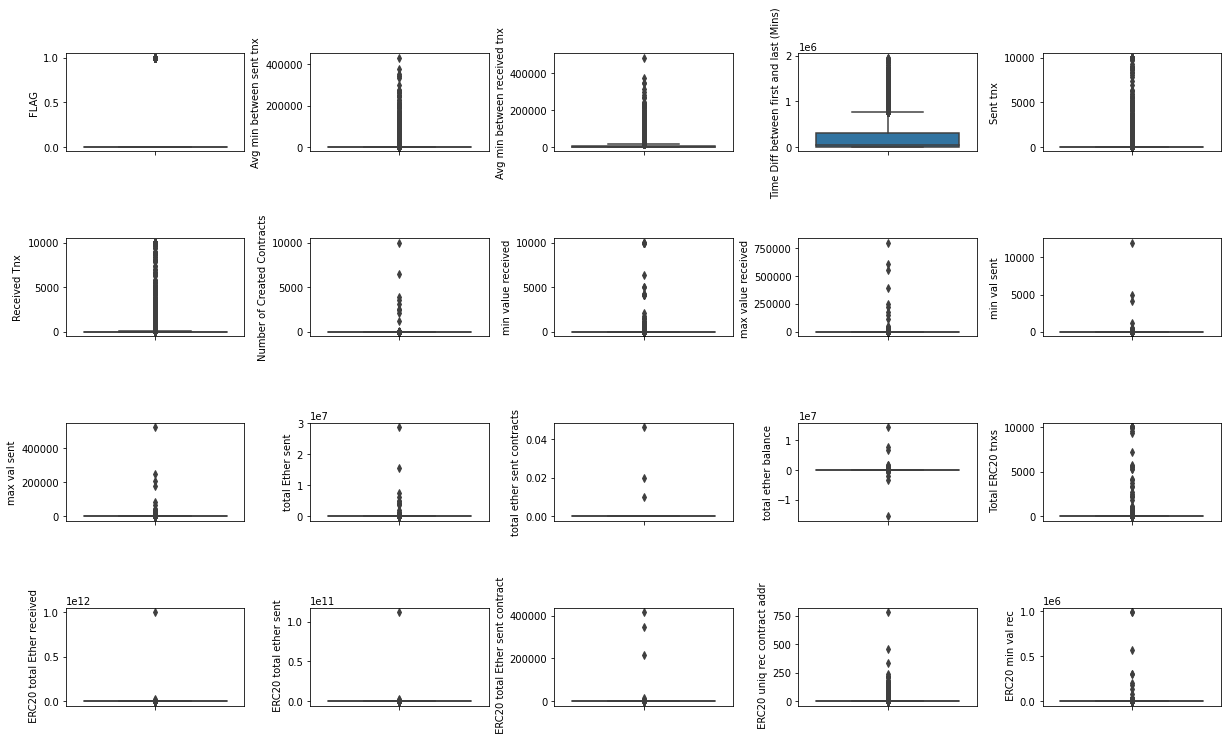

In [30]:
# box plot using pandas 
# box plot for Avg min between sent tnx column 
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize=(17,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
  sns.boxplot(y = col, data = df, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

* From all boxen plot we can see that the dataset is heavily skewed

## **DENDROGRAM**

Populating the interactive namespace from numpy and matplotlib


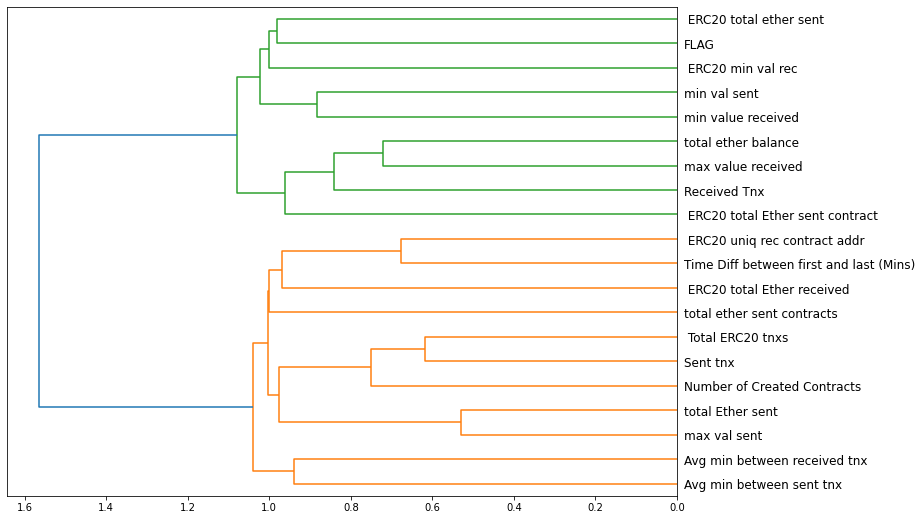

In [31]:
# Plot a Dendrogram on the columns of the dataset
# from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9
clustdf_t = df.transpose()
c_dist = pdist(clustdf_t) # computing the distance
c_link = linkage(clustdf_t,  metric='correlation', method='complete')# computing the linkage
B=dendrogram(c_link,labels=list(df.columns),orientation='left')
# droping the NaN values


## **DATA PREPROCESSING**



In [32]:
## Split the labels and the target
X = df.iloc[ : , 1: ]
y = df.iloc[ : , :1 ]

#check the shape 
print(X.shape)
print(y.shape)

(9841, 19)
(9841, 1)


In [33]:
# import train test split
from sklearn.model_selection import train_test_split

In [34]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# check the shape of train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7872, 19)
(1969, 19)
(7872, 1)
(1969, 1)


## **HANDLING SKEWNESS**

In [35]:
# import pipeline
#import standaer scalar
# import simple imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [36]:
# create pipeline
# 1.simple imputer
# 2. standard scalar 
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [37]:
# fit the pipline on train data
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

# HANDLING IMBALANCE

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

SMOTE - https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [38]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE class
sm = SMOTE(sampling_strategy='minority')

# Fit and transform the training data using SMOTE
X_train, y_train = sm.fit_resample(X_train, y_train)

# Print the shape of X_train after oversampling
print("Shape of X_train after oversampling:", X_train.shape)

# Print the shape of y_train after oversampling
print("Shape of y_train after oversampling:", y_train.shape)


Shape of X_train after oversampling: (12222, 19)
Shape of y_train after oversampling: (12222, 1)


## **MODELING**

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Evaluation Metrics
from sklearn.metrics import accuracy_score,roc_auc_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_curve 
# Plots
from sklearn import tree

In [40]:
# Function for calculating all the relevant metrics 
"""Function to calculate all evaluation metrics"""
def evaluation(y_test,y_pred):
    Accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    Precision = true_positive /(true_positive + false_positive)
    Recall = true_positive/(true_positive + false_negative)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    AUC = roc_auc_score(y_test, y_pred)
    return Accuracy,Precision,Recall,F1_Score,AUC


## **Model Creation**

## **Hyper parameter tunning**
* A hyperparameter is a parameter whose value is set before the learning process begins
* Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model
* Every machine learning models will have different hyperparameters that can be set

**Note:** Directly hpyerparametr tuning has been done to get the best accuracy based on the experience. Beginner should always build basic model first then go for hyper parameter tuning


In [41]:
'''Hyperparameters of Logistics Regression'''
LR_parameters = {
    'C': np.random.uniform(0.001,1,5),
    'tol':np.random.uniform(0.0001,0.1,5) 
    }

'''Hyperparameters of SGD Classifier With Hinge Loss'''
SGD_parameters = {
    'penalty': ['l1','l2'], 
    'alpha':np.random.uniform(0.0001,0.1,9) 
    }

'''Hyperparameters of Naive Bayes'''
NB_parameters = {
    'var_smoothing': np.random.uniform(1e-16,1e-14,100)
    }

'''Hyperparameters of Decision Tree Classifier'''
DTC_parameters = {
    'max_depth': np.random.randint(10,25,5)
    }

'''Hyperparameters of Random Forest Classifer'''
RF_parameters = {
    'n_estimators': [300,500,600,650,700],
    'max_depth': [80,110,125,135]
    }

'''Hyperparameters of Gradient Boosted Decision Trees'''
GBDT_parameters = {
    'n_estimators':[100, 250,350,500],
    'max_depth': [4,6,10,15],
    'learning_rate':[0.001,0.01,0.1,1,10]
    }

'''Hyperparameters of AdaBoost Classifier'''
AB_parameters = {
    'n_estimators':[ 400 , 600 , 650 , 700 , 750 , 800 ]
    }

'''All Models'''
models = {
1 : RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = LR_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
2 : RandomizedSearchCV(estimator = SGDClassifier(), param_distributions = SGD_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
3 : RandomizedSearchCV(estimator = GaussianNB(), param_distributions = NB_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
4 : RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions = DTC_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
5 : RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = RF_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
6 : RandomizedSearchCV(estimator = GradientBoostingClassifier(), param_distributions = GBDT_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
7 : RandomizedSearchCV(estimator = AdaBoostClassifier(), param_distributions = AB_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5)

}

map_keys = list(models.keys())

In [42]:

# Get model name using id from linear_model_collection
def get_model_building_technique_name(num):
  if num == 1:
    return 'LogisticRegression_Tuned'
  if num == 2:
    return 'SGDClassifier_Hinge_Loss_Tuned'
  if num == 3:
    return 'NaiveBayes_Tune'
  if num == 4:
    return 'DecisionTreeClassifier_Tuned'
  if num == 5:
    return 'RandomForestClassifier_Tuned'
  if num == 6:
    return 'GradientBoostingClassifier_Tuned'
  if num == 7:
    return 'AdaBoostClassifier_Tuned'
  return ''

In [43]:
results = [];
for key_index in range(len(map_keys)):
  key = map_keys[key_index]
  try:  
    # if key in [3,4,5,6,7,8]:
    model = models[key]
    print(key)
    model.fit(X_train, y_train)

    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    '''Test Accuracy'''
    Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test, AUC_Test =  evaluation(y_test, y_pred_test)
    
    '''Train Accuracy'''
    y_pred_train = model.predict(X_train)

    Accuracy_Train, Precision_Train, Recall_Train, F1_Score_Train, AUC_Train =  evaluation(y_train, y_pred_train)

    results.append({
        'Model Name' : get_model_building_technique_name(key),
        'Trained Model' : model,
        'Accuracy_Test' : Accuracy_Test,
        'Precision_Test' : Precision_Test,
        'Recall_Test' : Recall_Test, 
        'F1_Macro_Score_Test' : F1_Score_Test, 
        'AUC_Test' : AUC_Test,
        'Accuracy_Train' : Accuracy_Train,
        'Precision_Train' : Precision_Train,
        'Recall_Train' : Recall_Train, 
        'F1_Macro_Score_Train' : F1_Score_Train, 
        'AUC_Train' : AUC_Train
        })

  except Exception as e:
    print(e)


1
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


4
Fitting 5 folds for each of 5 candidates, totalling 25 fits
5
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


6
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
result_df = pd.DataFrame(results)
result_df
# result_df_test = result_df.iloc[: , [0,2,3,4,5,6]]
# result_df_test
# result_df_train = result_df.iloc[: , [0,7,8,9,10,11]]
# result_df_train


,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Macro_Score_Test,AUC_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Macro_Score_Train,AUC_Train
0,LogisticRegression_Tuned,"RandomizedSearchCV(cv=5, estimator=LogisticReg...",0.604368,0.535783,0.933708,0.680868,0.697318,0.707822,0.552610,0.801376,0.654140,0.707822
1,SGDClassifier_Hinge_Loss_Tuned,"RandomizedSearchCV(cv=5, estimator=SGDClassifi...",0.601828,0.534494,0.930415,0.678952,0.693084,0.705367,0.552774,0.795572,0.652312,0.705367
2,NaiveBayes_Tune,"RandomizedSearchCV(cv=5, estimator=GaussianNB(...",0.311326,0.128304,0.980296,0.226910,0.559367,0.566519,0.150057,0.898139,0.257151,0.566519
3,DecisionTreeClassifier_Tuned,"RandomizedSearchCV(cv=5, estimator=DecisionTre...",0.960386,0.974855,0.974855,0.974855,0.940777,1.000000,1.000000,1.000000,1.000000,1.000000
4,RandomForestClassifier_Tuned,"RandomizedSearchCV(cv=5, estimator=RandomFores...",0.974606,0.984526,0.983258,0.983892,0.961163,1.000000,1.000000,1.000000,1.000000,1.000000
5,GradientBoostingClassifier_Tuned,"RandomizedSearchCV(cv=5, estimator=GradientBoo...",0.974099,0.982592,0.984496,0.983543,0.962588,1.000000,1.000000,1.000000,1.000000,1.000000
6,AdaBoostClassifier_Tuned,"RandomizedSearchCV(cv=5, estimator=AdaBoostCla...",0.965465,0.970342,0.985593,0.977908,0.958855,0.984045,0.982163,0.985874,0.984015,0.984045


**ROC Curve**
* The overall performance of a classifier, summarized over all possible thresholds, is given by the Receiver Operating Characteristics (ROC) curve. The name “ROC” is historical and comes from communications theory. ROC Curves are used to see how well your classifier can separate positive and negative examples and to identify the best threshold for separating them.
* To be able to use the ROC curve, your classifier should be able to rank examples such that the ones with higher rank are more likely to be positive (fraudulent)
* ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

**AUC (Area Under the Curve)**
* The model performance is determined by looking at the area under the ROC curve (or AUC). An excellent model has AUC near to the 1.0, which means it has a good measure of separability

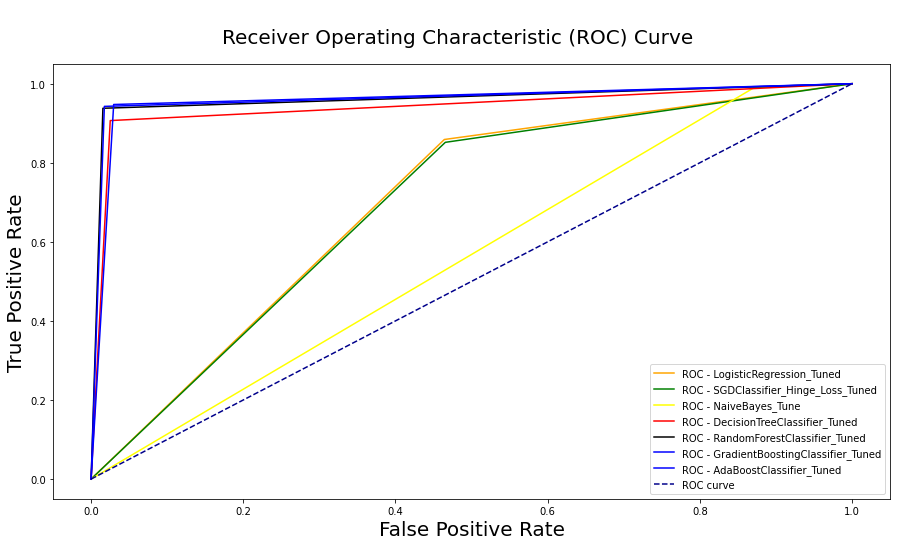

In [54]:
fpr_dict = {}
tpr_dict = {}
for i in range(len(map_keys)):
  
    model_pred = result_df['Trained Model'][i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)
    fpr_dict[i] = fpr
    tpr_dict[i] = tpr

plt.figure(figsize=(15,8))
plt.suptitle('\nReceiver Operating Characteristic (ROC) Curve', fontsize=20)
plt.plot(fpr_dict[0], tpr_dict[0], color='orange', label=f"ROC - {result_df['Model Name'][0]}")
plt.plot(fpr_dict[1], tpr_dict[1], color='green', label=f"ROC - {result_df['Model Name'][1]}")
plt.plot(fpr_dict[2], tpr_dict[2], color='yellow', label=f"ROC - {result_df['Model Name'][2]}")
plt.plot(fpr_dict[3], tpr_dict[3], color='red', label=f"ROC - {result_df['Model Name'][3]}")
plt.plot(fpr_dict[4], tpr_dict[4], color='black', label=f"ROC - {result_df['Model Name'][4]}")
plt.plot(fpr_dict[5], tpr_dict[5], color='blue', label=f"ROC - {result_df['Model Name'][5]}")
plt.plot(fpr_dict[6], tpr_dict[6], color='blue', label=f"ROC - {result_df['Model Name'][6]}")

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve')
plt.xlabel('False Positive Rate',fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate',fontdict={'fontsize': 20})
plt.legend()
plt.show()

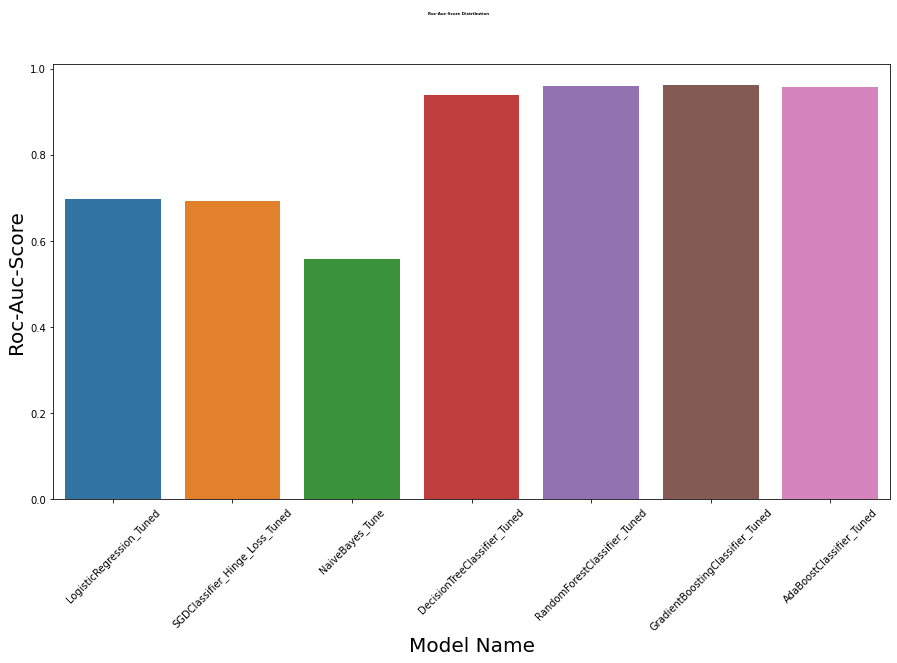

In [55]:
plt.figure(figsize=(15,8)) 
plt.suptitle('\nRoc-Auc-Score Distribution\n\n', fontsize=4, fontweight='bold')
sns.barplot(data=result_df, x='Model Name', y='AUC_Test')
plt.xlabel('Model Name',fontdict={'fontsize': 20})
plt.ylabel('Roc-Auc-Score',fontdict={'fontsize': 20})
plt.xticks(rotation=45)
plt.show()

In [56]:
Best_Model_Name = result_df['Trained Model'][result_df[result_df['AUC_Test'] == max(result_df['AUC_Test'])]['Trained Model'].index[0]]
Best_Model_Index = result_df['Trained Model'][result_df[result_df['AUC_Test'] == max(result_df['AUC_Test'])]['Trained Model'].index].index[0]
Best_Model_Name

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'max_depth': [4, 6, 10, 15],
                                        'n_estimators': [100, 250, 350, 500]},
                   scoring='f1', verbose=2)

In [57]:
import pickle
with open('ETHEREUM_Fraud_Detection.sav', 'wb') as best_model_pickle:
 pickle.dump(Best_Model_Name, best_model_pickle)

## **Conclusion**

* We did training and prediction using all the above models and selected Gradient Boosting Classifier as final model as it performed well compard to other models with acurracy of 98%
* We have performed EDA, preprocessing, build different models, visualized feature importance, hyper parameter tunning and did prediction
* We also perform necessary operations to handle imbalanced and skewed nature of data 

# **<center> THE END </center>**